<a href="https://colab.research.google.com/github/princevalerie/ATS_CV_Enchanment/blob/main/Clustering/Customer_Segmentation_Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/tata/Online Retail Data Set.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    532621 non-null  object        
 1   StockCode    532621 non-null  object        
 2   Description  531167 non-null  object        
 3   Quantity     532621 non-null  int64         
 4   InvoiceDate  532621 non-null  datetime64[ns]
 5   UnitPrice    532621 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      532621 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.6+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,532621.000000,532621,532621.000000,397924.000000
mean,10.239972,2011-07-04 17:06:10.804305920,3.847621,15294.315171
min,-9600.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13969.000000
50%,3.000000,2011-07-20 11:54:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:21:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,159.593551,NaN,41.758023,1713.169877


In [ ]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,532621,532621,531167,532621
unique,22064,4059,4207,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2271,2327,487622


In [ ]:
df = df[df['Quantity'] > 0]

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df = df[df['UnitPrice'] > 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [ ]:
customer_null = df[df['CustomerID'].isna()]
customer_null

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
customer_null.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,132220,132220,132220,132220
unique,1428,3408,3371,9
top,573585,DOT,DOTCOM POSTAGE,United Kingdom
freq,1114,690,690,130802


In [ ]:
customer_null['StockCode'].nunique()

3408

In [ ]:
customer_null['InvoiceDate'].nunique()

1326

In [ ]:
df.loc[df['CustomerID'].isnull(), 'CustomerID'] = 'U' + df.loc[df['CustomerID'].isnull(), 'InvoiceNo'].astype(str)

<ipython-input-16-f8d16447476b>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['U536544' 'U536544' 'U536544' ... 'U581498' 'U581498' 'U581498']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['CustomerID'].isnull(), 'CustomerID'] = 'U' + df.loc[df['CustomerID'].isnull(), 'InvoiceNo'].astype(str)


In [ ]:
customer_null = df[df['CustomerID'].isna()]
customer_null

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
219092,556082,21245,GREEN POLKADOT PLATE,3,2011-06-08 15:22:00,3.29,U556082,United Kingdom
18593,537823,20975,12 PENCILS SMALL TUBE RED RETROSPOT,3,2010-12-08 14:25:00,1.28,U537823,United Kingdom
223298,556479,22331,WOODLAND PARTY BAG + STICKER SET,1,2011-06-12 12:50:00,1.65,16983.0,United Kingdom
491969,578084,22940,FELTCRAFT CHRISTMAS FAIRY,4,2011-11-22 16:34:00,4.25,12465.0,Belgium
304731,563613,82613C,"METAL SIGN,CUPCAKE SINGLE HOOK",8,2011-08-18 08:49:00,1.25,12688.0,Israel
367473,568895,21174,POTTERING IN THE SHED METAL SIGN,3,2011-09-29 13:11:00,2.08,15356.0,United Kingdom
69759,541985,22801,ANTIQUE GLASS PEDESTAL BOWL,2,2011-01-24 15:52:00,3.75,15052.0,United Kingdom
64169,541593,85169D,PINK LOVE BIRD CANDLE,2,2011-01-19 15:20:00,1.25,17611.0,United Kingdom
41031,539750,84030e,ENGLISH ROSE HOT WATER BOTTLE,6,2010-12-21 15:40:00,5.91,U539750,United Kingdom
329735,565851,22460,EMBOSSED GLASS TEALIGHT HOLDER,12,2011-09-07 13:06:00,1.25,14911.0,EIRE


In [ ]:
# Ambil nilai unik pada kolom StockCode
unique_stock_codes = df['StockCode'].unique()

# Filter nilai unik yang tidak diawali dengan angka
# Ubah tipe data setiap elemen ke string sebelum memeriksa dengan startswith
non_numeric_stock_codes = [code for code in unique_stock_codes if not str(code).startswith(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))]

non_numeric_stock_codes

['POST',
 'C2',
 'DOT',
 'M',
 'BANK CHARGES',
 'AMAZONFEE',
 'DCGS0076',
 'DCGS0003',
 'gift_0001_40',
 'DCGS0070',
 'm',
 'gift_0001_50',
 'gift_0001_30',
 'gift_0001_20',
 'DCGS0069',
 'DCGSSBOY',
 'DCGSSGIRL',
 'gift_0001_10',
 'S',
 'PADS',
 'DCGS0004',
 'B']

In [ ]:
# Filter DataFrame based on 'StockCode' values
filtered_df = df[df['StockCode'].isin([ 'POST', 'DOT', 'BANK CHARGES','PADS'])]

# Display the filtered DataFrame
filtered_df.sample(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
136532,547964,DOT,DOTCOM POSTAGE,1,2011-03-28 15:45:00,184.60,U547964,United Kingdom
163441,550542,DOT,DOTCOM POSTAGE,1,2011-04-19 11:37:00,176.52,U550542,United Kingdom
497791,578472,POST,POSTAGE,9,2011-11-24 12:40:00,18.00,12476.0,Germany
191117,553316,POST,POSTAGE,1,2011-05-16 12:04:00,18.00,12682.0,France
34278,539327,POST,POSTAGE,1,2010-12-17 09:24:00,18.00,12600.0,Germany
76487,542626,POST,POSTAGE,2,2011-01-31 09:51:00,18.00,12720.0,Germany
176407,552000,DOT,DOTCOM POSTAGE,1,2011-05-05 15:56:00,49.62,U552000,United Kingdom
206881,554958,DOT,DOTCOM POSTAGE,1,2011-05-27 15:17:00,167.88,U554958,United Kingdom
361740,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,15.00,13405.0,United Kingdom
443119,574690,POST,POSTAGE,4,2011-11-06 13:11:00,40.00,12638.0,Sweden


In [ ]:
# Filter DataFrame based on 'StockCode' values
filtered_df = df[df['StockCode'].isin(['PADS','C2'])]

# Display the filtered DataFrame
filtered_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
169529,551187,C2,CARRIAGE,1,2011-04-27 10:02:00,50.0,14911.0,EIRE
469672,576603,C2,CARRIAGE,1,2011-11-15 15:22:00,50.0,14911.0,EIRE
353055,567720,C2,CARRIAGE,1,2011-09-22 10:37:00,50.0,14911.0,EIRE
205277,554770,C2,CARRIAGE,1,2011-05-26 11:40:00,50.0,14911.0,EIRE
360310,568221,C2,CARRIAGE,1,2011-09-26 10:05:00,50.0,14911.0,EIRE


In [ ]:
# Filter DataFrame based on 'StockCode' values
filtered_df = df[df['StockCode'].isin(['PADS','AMAZONFEE'])]

# Display the filtered DataFrame
filtered_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.330,U537632,United Kingdom
135534,547901,AMAZONFEE,AMAZON FEE,1,2011-03-28 11:57:00,219.760,U547901,United Kingdom
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom


In [ ]:
# Filter DataFrame berdasarkan StockCode yang diawali dengan "DCGS"
# Handle missing values by first converting to string and then applying startswith
filtered_df = df[df['StockCode'].astype(str).str.startswith('DCGS', na=False)]

# Tampilkan DataFrame yang difilter
display(filtered_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
21326,538071,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-12-09 14:09:00,16.13,U538071,United Kingdom
24906,538349,DCGS0003,BOXED GLASS ASHTRAY,1,2010-12-10 14:59:00,2.51,U538349,United Kingdom
36460,539451,DCGS0003,BOXED GLASS ASHTRAY,1,2010-12-17 16:59:00,2.51,U539451,United Kingdom
39313,539631,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2,2010-12-20 15:03:00,16.13,U539631,United Kingdom
40052,539718,DCGS0070,CAMOUFLAGE DOG COLLAR,1,2010-12-21 13:06:00,12.72,U539718,United Kingdom
75053,542541,DCGS0069,OOH LA LA DOGS COLLAR,1,2011-01-28 14:25:00,15.79,U542541,United Kingdom
76251,542622,DCGS0003,BOXED GLASS ASHTRAY,1,2011-01-31 09:09:00,2.46,U542622,United Kingdom
84016,543358,DCGSSBOY,BOYS PARTY BAG,1,2011-02-07 14:04:00,3.29,U543358,United Kingdom
84017,543358,DCGSSGIRL,GIRLS PARTY BAG,3,2011-02-07 14:04:00,3.29,U543358,United Kingdom
97246,544599,DCGSSBOY,BOYS PARTY BAG,1,2011-02-21 18:15:00,3.29,U544599,United Kingdom


In [ ]:
# Handle missing values by first converting to string and then applying startswith
filtered_df = df[df['StockCode'].astype(str).str.startswith('gift', na=False)]

# Tampilkan DataFrame yang difilter
display(filtered_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-12-20 10:14:00,34.04,U539492,United Kingdom
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2010-12-23 13:26:00,42.55,U539958,United Kingdom
44725,540238,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-01-05 14:44:00,25.53,U540238,United Kingdom
44794,540238,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-05 14:44:00,17.02,U540238,United Kingdom
55589,540995,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-13 09:30:00,16.67,U540995,United Kingdom
91278,544089,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-02-15 17:51:00,16.67,U544089,United Kingdom
94054,544323,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-17 15:51:00,25.00,U544323,United Kingdom
95034,544434,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-18 16:12:00,25.00,U544434,United Kingdom
112442,545895,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-03-07 17:14:00,8.33,U545895,United Kingdom
145463,548893,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2011-04-04 15:54:00,33.33,U548893,United Kingdom


In [ ]:
# Filter DataFrame based on 'StockCode' values
filtered_df = df[df['StockCode'].isin(['M', 'S', 'B', 'm'])]

# Display the filtered DataFrame
display(filtered_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,U536865,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom
...,...,...,...,...,...,...,...,...
526015,580645,M,Manual,1,2011-12-05 13:11:00,219.50,17857.0,United Kingdom
526018,580646,M,Manual,800,2011-12-05 13:13:00,0.25,17857.0,United Kingdom
530876,580884,M,Manual,1,2011-12-06 12:21:00,0.85,15907.0,United Kingdom
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom


In [ ]:
# Filter DataFrame based on 'StockCode' values
filtered_df = df[df['StockCode'].isin([ 'S', 'B', 'm'])]

# Display the filtered DataFrame
filtered_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40383,539736,m,Manual,1,2010-12-21 15:18:00,2.55,U539736,United Kingdom
152709,549684,S,SAMPLES,1,2011-04-11 13:24:00,30.00,U549684,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,UA563185,United Kingdom
419666,572849,S,SAMPLES,1,2011-10-26 12:20:00,33.05,U572849,United Kingdom


In [ ]:
# Values to remove
remove_values = ['POST',
                'C2',
                'DOT',
                'M',
                'BANK CHARGES',
                'AMAZONFEE',
                'm',
                 'S',
                'PADS',
                'DCGS0004',
                'B'
                 ]

# Filter out rows containing the specified values in 'StockCode'
filtered_df = df[~df['StockCode'].isin(remove_values)]

# Update the original DataFrame 'df'
df = filtered_df

In [ ]:
# Ambil nilai unik pada kolom StockCode
unique_stock_codes = df['StockCode'].unique()

# Filter nilai unik yang tidak diawali dengan angka
# Ubah tipe data setiap elemen ke string sebelum memeriksa dengan startswith
non_numeric_stock_codes = [code for code in unique_stock_codes if not str(code).startswith(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))]

non_numeric_stock_codes

['DCGS0076',
 'DCGS0003',
 'gift_0001_40',
 'DCGS0070',
 'gift_0001_50',
 'gift_0001_30',
 'gift_0001_20',
 'DCGS0069',
 'DCGSSBOY',
 'DCGSSGIRL',
 'gift_0001_10']

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Filter DataFrame based on 'InvoiceNo' not starting with a digit
filtered_df = df[~df['InvoiceNo'].astype(str).str.startswith(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))]

# Display the filtered DataFrame
display(filtered_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df['Country'].value_counts()

,count
Country,
United Kingdom,484034
Germany,8658
France,8100
EIRE,7779
Spain,2422
Netherlands,2322
Switzerland,1935
Belgium,1935
Portugal,1464


In [ ]:
# prompt: BUATKAN KOLOM BARU UNTUK MAPPING BENUA

# Assuming 'df' is your DataFrame and it contains a 'Country' column

def map_continent(country):
  continents = {
      'United Kingdom': 'Europe',
      'Germany': 'Europe',
      'France': 'Europe',
      'EIRE': 'Europe',
      'Spain': 'Europe',
      'Netherlands': 'Europe',
      'Belgium': 'Europe',
      'Switzerland': 'Europe',
      'Portugal': 'Europe',
      'Australia': 'Oceania',
      'Norway': 'Europe',
      'Italy': 'Europe',
      'Channel Islands': 'Europe',
      'Finland': 'Europe',
      'Cyprus': 'Europe',
      'Sweden': 'Europe',
      'Austria': 'Europe',
      'Denmark': 'Europe',
      'Poland': 'Europe',
      'Japan': 'Asia',
      'Israel': 'Asia',
      'USA': 'North America',
      'Unspecified': 'Unknown',
      'Singapore': 'Asia',
      'Iceland': 'Europe',
      'Canada': 'North America',
      'Greece': 'Europe',
      'Malta': 'Europe',
      'United Arab Emirates': 'Asia',
      'European Community': 'Europe',
      'Bahrain': 'Asia',
      'Lithuania': 'Europe',
      'Lebanon': 'Asia',
      'Brazil': 'South America',
      'RSA': 'Africa',
      'Czech Republic': 'Europe',
      'Saudi Arabia': 'Asia'
  }
  return continents.get(country, 'Unknown') # Return 'Unknown' for countries not in the dictionary


df['Continent'] = df['Country'].apply(map_continent)
df['Continent'].value_counts()

<ipython-input-50-9b0b2d3766bd>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Continent'] = df['Country'].apply(map_continent)


,count
Continent,
Europe,524494
Oceania,1181
Asia,970
Unknown,725
North America,329
Africa,57
South America,32


In [ ]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,CustomerID,Country,Continent
count,527788,527788,527788,527788.0,527788,527788
unique,19773,3911,4016,5705.0,38,7
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841.0,United Kingdom,Europe
freq,1113,2265,2323,7838.0,484034,524494


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,527788.000000,527788,527788.000000
mean,10.566993,2011-07-04 21:25:40.719076352,3.266458
min,1.000000,2010-12-01 08:26:00,0.040000
25%,1.000000,2011-03-28 12:23:00,1.250000
50%,3.000000,2011-07-20 13:26:00,2.080000
75%,11.000000,2011-10-19 13:38:00,4.130000
max,80995.000000,2011-12-09 12:50:00,649.500000
std,155.830004,NaN,4.380785


In [ ]:
df['Revenue']=df['Quantity']*df['UnitPrice']
df

<ipython-input-54-bf937be2acb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue']=df['Quantity']*df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Europe,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Europe,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Europe,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Europe,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Europe,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Europe,16.60


In [ ]:
df["InvoiceNo"] = df["InvoiceNo"].astype(str)
df["InvoiceNo"].str.replace("[0-9]", "", regex=True).unique()

<ipython-input-57-efd7d39d54ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvoiceNo"] = df["InvoiceNo"].astype(str)


array([''], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527788 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    527788 non-null  object        
 1   StockCode    527788 non-null  object        
 2   Description  527788 non-null  object        
 3   Quantity     527788 non-null  int64         
 4   InvoiceDate  527788 non-null  datetime64[ns]
 5   UnitPrice    527788 non-null  float64       
 6   CustomerID   527788 non-null  object        
 7   Country      527788 non-null  object        
 8   Continent    527788 non-null  object        
 9   Revenue      527788 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 44.3+ MB


In [ ]:
df_clean=df.copy()
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Europe,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Europe,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Europe,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Europe,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Europe,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Europe,16.60


In [ ]:
country_replacements = {
    'EIRE': 'Ireland',
    'Channel Islands': 'Jersey and Guernsey',
    'RSA': 'South Africa',
    'European Community': 'European Union',
    'USA': 'United States'
}

# Ganti nama negara di kolom 'Country'
df_clean['Country'] = df_clean['Country'].replace(country_replacements)
df_clean.value_counts('Country')

,count
Country,
United Kingdom,484034
Germany,8658
France,8100
Ireland,7779
Spain,2422
Netherlands,2322
Belgium,1935
Switzerland,1935
Portugal,1464


In [ ]:
df_clean['CustomerID'].sample(10)

,CustomerID
298636,14834.0
456256,16903.0
193858,U553545
310972,U564221
539036,17757.0
433923,15576.0
400949,14911.0
505450,14911.0
259592,15577.0
148171,18272.0


In [ ]:
# prompt: buatkan kolom baru Status untuk mendeteksi U padacustomer ID apabila ada maka Unregistered jika tidak maka Registered

# Create the 'Status' column based on 'CustomerID'
df_clean['Status'] = np.where(df_clean['CustomerID'].astype(str).str.startswith('U'), 'Unregistered', 'Registered')

In [ ]:
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Continent,Revenue,Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Europe,15.30,Registered
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,20.34,Registered
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Europe,22.00,Registered
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,20.34,Registered
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,20.34,Registered
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Europe,10.20,Registered
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Europe,12.60,Registered
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Europe,16.60,Registered
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Europe,16.60,Registered


# Clustering by id

In [ ]:
df_user = df_clean.groupby('CustomerID', as_index=False).agg(Frequency=('InvoiceNo','nunique'),Max_Order_Date=('InvoiceDate','max'),Monetary=('Revenue','sum'))
df_user

,CustomerID,Frequency,Max_Order_Date,Monetary
0,12346.0,1,2011-01-18 10:01:00,77183.60
1,12347.0,7,2011-12-07 15:52:00,4310.00
2,12348.0,4,2011-09-25 13:13:00,1437.24
3,12349.0,1,2011-11-21 09:51:00,1457.55
4,12350.0,1,2011-02-02 16:01:00,294.40
...,...,...,...,...
5700,U581435,1,2011-12-08 16:14:00,3.35
5701,U581439,1,2011-12-08 16:30:00,5699.00
5702,U581492,1,2011-12-09 10:03:00,6756.06
5703,U581497,1,2011-12-09 10:23:00,3217.20


In [ ]:
today = df_clean['InvoiceDate'].max()
df_user['Recency'] = (today - df_user['Max_Order_Date']).dt.days
df_user

,CustomerID,Frequency,Max_Order_Date,Monetary,Recency
0,12346.0,1,2011-01-18 10:01:00,77183.60,325
1,12347.0,7,2011-12-07 15:52:00,4310.00,1
2,12348.0,4,2011-09-25 13:13:00,1437.24,74
3,12349.0,1,2011-11-21 09:51:00,1457.55,18
4,12350.0,1,2011-02-02 16:01:00,294.40,309
...,...,...,...,...,...
5700,U581435,1,2011-12-08 16:14:00,3.35,0
5701,U581439,1,2011-12-08 16:30:00,5699.00,0
5702,U581492,1,2011-12-09 10:03:00,6756.06,0
5703,U581497,1,2011-12-09 10:23:00,3217.20,0


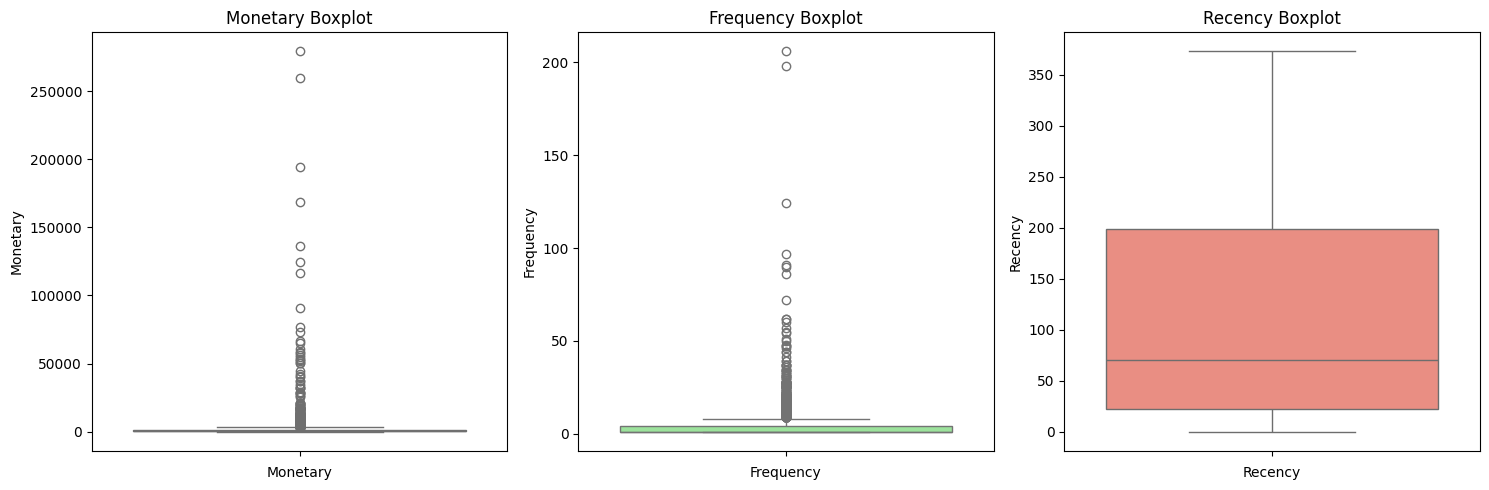

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Use df_user instead of df_clean for Monetary
plt.subplot(1, 3, 1)
sns.boxplot(data=df_user['Monetary'], color='skyblue')
plt.title('Monetary Boxplot')
plt.xlabel('Monetary')

# Use df_user instead of df_clean for Frequency
plt.subplot(1, 3, 2)
sns.boxplot(data=df_user['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

# Use df_user instead of df_clean for Recency
plt.subplot(1, 3, 3)
sns.boxplot(data=df_user['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [ ]:

# Calculate quartiles and IQR for 'Monetary'
M_Q1 = df_user["Monetary"].quantile(0.25)
M_Q3 = df_user["Monetary"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

# Identify outliers
outliers_monetary = df_user[(df_user["Monetary"] > (M_Q3 + 1.5 * M_IQR)) | (df_user["Monetary"] < (M_Q1 - 1.5 * M_IQR))]

outliers_monetary.describe()

,Frequency,Max_Order_Date,Monetary,Recency
count,534.000000,534,534.000000,534.000000
mean,13.576779,2011-10-24 07:04:00.561797632,11302.355824,45.760300
min,1.000000,2010-12-01 14:32:00,3579.670000,0.000000
25%,4.000000,2011-11-08 10:18:45,4235.837500,3.000000
50%,10.000000,2011-11-25 14:54:00,5478.790000,13.000000
75%,17.000000,2011-12-05 17:08:15,8490.450000,31.000000
max,206.000000,2011-12-09 12:49:00,279138.020000,372.000000
std,18.085286,NaN,23614.135642,89.330503


In [ ]:

# Calculate quartiles and IQR for 'Frequency'
M_Q1 = df_user["Frequency"].quantile(0.25)
M_Q3 = df_user["Frequency"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

# Identify outliers
outliers_frequency = df_user[(df_user["Frequency"] > (M_Q3 + 1.5 * M_IQR)) | (df_user["Frequency"] < (M_Q1 - 1.5 * M_IQR))]

outliers_frequency.describe()

,Frequency,Max_Order_Date,Monetary,Recency
count,455.000000,455,455.000000,455.000000
mean,17.964835,2011-11-21 18:59:43.780219904,10312.755670,17.261538
min,9.000000,2010-12-02 15:27:00,721.630000,0.000000
25%,10.000000,2011-11-18 10:28:00,2907.900000,2.000000
50%,13.000000,2011-12-01 08:33:00,4684.760000,8.000000
75%,19.000000,2011-12-06 14:18:30,7982.075000,21.000000
max,206.000000,2011-12-09 12:49:00,279138.020000,371.000000
std,17.747336,NaN,24193.529208,31.591622


In [ ]:
non_outliers_df = df_user[(~df_user.index.isin(outliers_monetary.index)) & (~df_user.index.isin(outliers_frequency.index))]
non_outliers_df.describe()

,Frequency,Max_Order_Date,Monetary,Recency
count,5014.000000,5014,5014.000000,5014.000000
mean,2.146789,2011-08-04 05:22:01.256481792,768.650369,126.761268
min,1.000000,2010-12-01 09:53:00,0.420000,0.000000
25%,1.000000,2011-05-10 13:36:00,202.350000,29.000000
50%,1.000000,2011-09-15 11:19:30,486.940000,85.000000
75%,3.000000,2011-11-09 13:41:15,1130.955000,212.000000
max,8.000000,2011-12-09 12:50:00,3563.850000,373.000000
std,1.698614,NaN,767.773306,111.162981


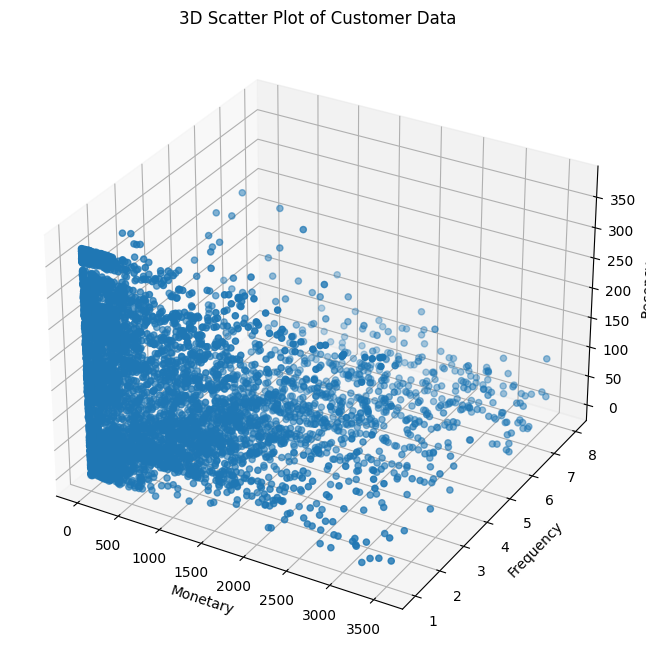

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["Monetary"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["Monetary", "Frequency", "Recency"]])

scaled_data

array([[ 0.87090331,  1.09112217, -0.47467718],
       [ 0.89735907, -0.67519936, -0.97849226],
       [-0.61775744, -0.67519936,  1.63954678],
       ...,
       [-0.9779257 , -0.67519936, -1.14043281],
       [-0.99687849, -0.67519936, -1.14043281],
       [ 3.1894751 , -0.67519936, -1.14043281]])

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
2,0.870903,1.091122,-0.474677
3,0.897359,-0.675199,-0.978492
4,-0.617757,-0.675199,1.639547
5,0.803820,2.857444,-0.825548
6,-0.885311,-0.675199,0.685897
...,...,...,...
5690,-0.988281,-0.675199,-1.113443
5694,-0.970488,-0.675199,-1.131436
5699,-0.977926,-0.675199,-1.140433
5700,-0.996878,-0.675199,-1.140433


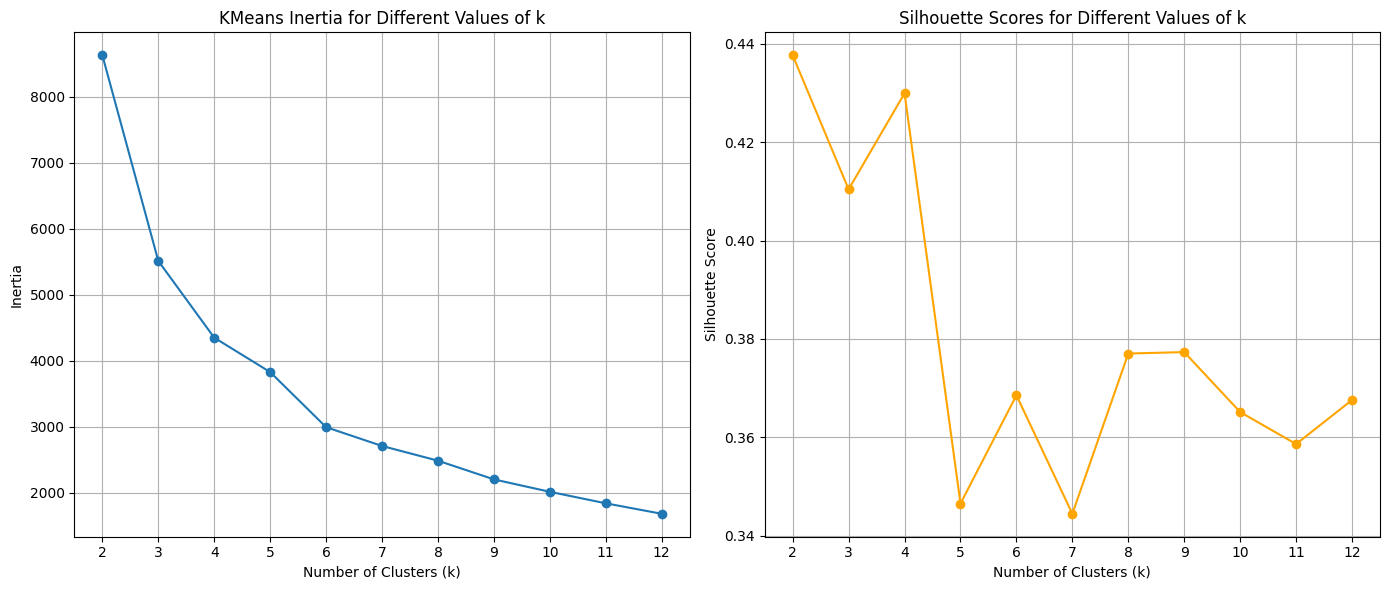

In [ ]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

KMeans Inertia for Different Values of k (Grafik Kiri):

Grafik ini menunjukkan nilai inertia atau within-cluster sum of squares untuk berbagai nilai
𝑘
k. Semakin kecil nilai inertia, semakin baik model dalam mengelompokkan data ke dalam kluster.
Dari grafik, kita dapat melihat bahwa nilai inertia menurun tajam hingga sekitar
𝑘
=
4
k=4, setelah itu penurunan mulai melambat. Fenomena ini disebut sebagai "elbow" (siku), yang sering kali merupakan indikasi jumlah kluster yang optimal.


---


Silhouette Scores for Different Values of k (Grafik Kanan):

Grafik ini menunjukkan nilai silhouette score untuk berbagai nilai
𝑘
k. Silhouette score mengukur seberapa mirip objek dalam satu kluster dibandingkan dengan objek di kluster lain. Nilai ini berkisar antara -1 dan 1; semakin tinggi nilai silhouette score, semakin baik pemisahan kluster.
Di grafik ini, nilai silhouette score terlihat tertinggi di
𝑘
=
2
k=2 dan
𝑘
=
4
k=4, yang menunjukkan bahwa pada jumlah kluster tersebut, kluster lebih terpisah dengan baik.


---


Rekomendasi Jumlah Kluster
Berdasarkan "Elbow Method" dan Silhouette Score:
Dari grafik inertia, titik "elbow" terjadi sekitar
𝑘
=
4
k=4, sehingga ini bisa menjadi pilihan yang baik untuk jumlah kluster.
Dari grafik silhouette score, nilai juga cukup tinggi di
𝑘
=
4
k=4, mengonfirmasi bahwa
𝑘
=
4
k=4 menghasilkan kluster yang cukup baik dari segi pemisahan antar kluster.


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([2, 3, 0, ..., 1, 1, 3], dtype=int32)

In [ ]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

<ipython-input-87-c531f568f2b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,CustomerID,Frequency,Max_Order_Date,Monetary,Recency,Cluster
2,12348.0,4,2011-09-25 13:13:00,1437.24,74,2
3,12349.0,1,2011-11-21 09:51:00,1457.55,18,3
4,12350.0,1,2011-02-02 16:01:00,294.40,309,0
5,12352.0,7,2011-11-03 14:37:00,1385.74,35,2
6,12353.0,1,2011-05-19 17:47:00,89.00,203,0
...,...,...,...,...,...,...
5690,U580748,1,2011-12-06 09:48:00,9.95,3,1
5694,U581197,1,2011-12-07 17:56:00,23.61,1,1
5699,U581431,1,2011-12-08 15:49:00,17.90,0,1
5700,U581435,1,2011-12-08 16:14:00,3.35,0,1


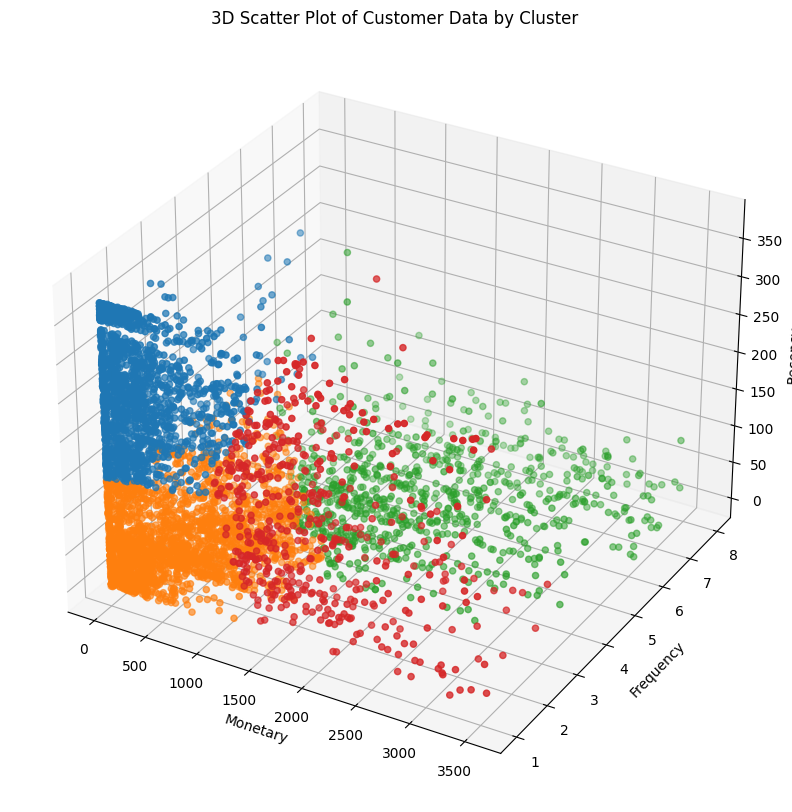

In [ ]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['Monetary'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

<ipython-input-91-b0518c9bf3a5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Monetary', data=non_outliers_df, palette='Set1')
<ipython-input-91-b0518c9bf3a5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Frequency', data=non_outliers_df, palette='Set1')
<ipython-input-91-b0518c9bf3a5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Recency', data=non_outliers_df, palette='Set1')


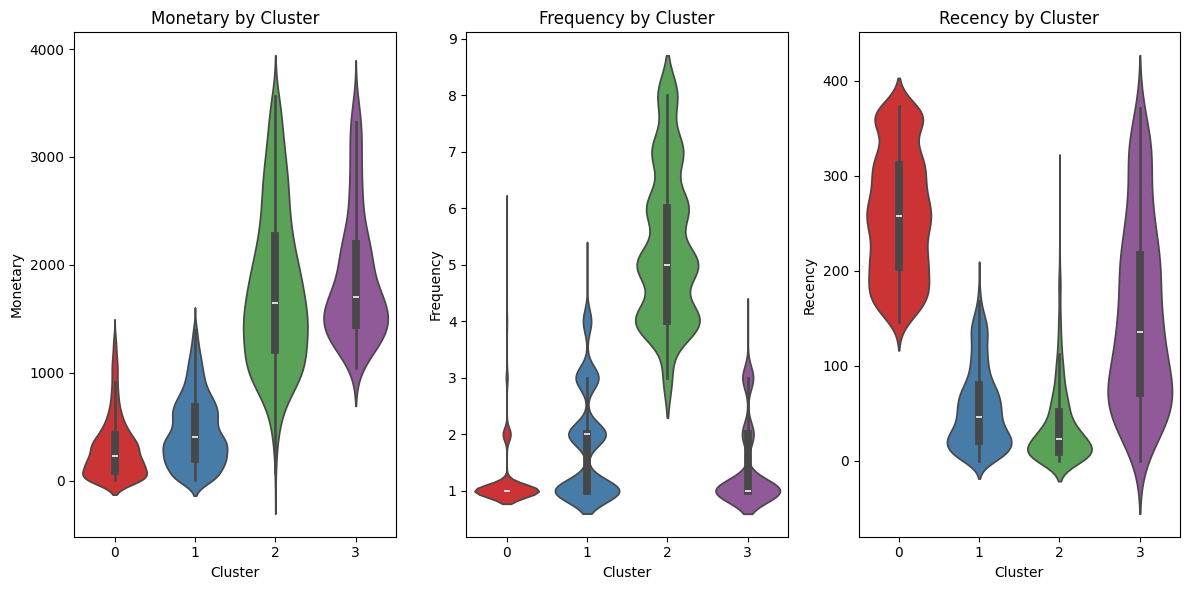

In [ ]:
# prompt: visualisasikan violinplot untuk setiap rfm

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'non_outliers_df' is your DataFrame with the 'Cluster' column

plt.figure(figsize=(12, 6))

# Create violin plots for each RFM variable, separated by cluster
plt.subplot(1, 3, 1)
sns.violinplot(x='Cluster', y='Monetary', data=non_outliers_df, palette='Set1')
plt.title('Monetary by Cluster')

plt.subplot(1, 3, 2)
sns.violinplot(x='Cluster', y='Frequency', data=non_outliers_df, palette='Set1')
plt.title('Frequency by Cluster')

plt.subplot(1, 3, 3)
sns.violinplot(x='Cluster', y='Recency', data=non_outliers_df, palette='Set1')
plt.title('Recency by Cluster')

plt.tight_layout()
plt.show()

##Indonesia


**Cluster 0 - "Lost Customers"**

  Karakteristik:

  Monetary: Rendah::

  Frequency: Rendah

  Recency: Tinggi (sudah lama tidak bertransaksi)


Deskripsi:

Pelanggan dalam kluster ini jarang bertransaksi dan memiliki nilai transaksi rendah. Mereka sudah lama tidak melakukan transaksi, sehingga cenderung menjadi pelanggan yang tidak aktif.


Strategi:

**Re-engagement Campaign**: Kirim email atau pesan promosi khusus untuk menarik kembali minat mereka, seperti diskon eksklusif, penawaran "Welcome Back", atau voucher.

**Loyalty Programs**: Berikan insentif bagi mereka untuk kembali bertransaksi, misalnya melalui program loyalitas atau poin rewards.

**Survei Feedback**: Mengirim survei untuk memahami mengapa mereka berhenti bertransaksi dan melihat apakah ada yang bisa ditingkatkan.


---


**Cluster 1 - "Occasional Customers"**

  Karakteristik:

  Monetary: Menengah ke rendah

  Frequency: Menengah ke rendah

  Recency: Menengah ke tinggi

Deskripsi:

Pelanggan ini bertransaksi sesekali dengan nilai transaksi menengah ke rendah. Mereka tidak terlalu sering melakukan transaksi, tetapi masih memiliki beberapa aktivitas.

Strategi:

**Periodic Discounts**: Tawarkan diskon berkala untuk mendorong mereka bertransaksi lebih sering.

**Personalized Recommendations**: Berikan rekomendasi produk atau layanan yang mungkin menarik bagi mereka berdasarkan riwayat transaksi sebelumnya.

**Upsell and Cross-sell**: Coba tawarkan produk atau layanan yang relevan untuk meningkatkan nilai transaksi saat mereka berbelanja.


---


**Cluster 2 - "High-Value Loyal Customers"**

  Karakteristik:

  Monetary: Tinggi
  
  Frequency: Tinggi

  Recency: Rendah (sering melakukan transaksi baru-baru ini)


Deskripsi:

Kluster ini berisi pelanggan setia dengan nilai transaksi yang tinggi dan frekuensi transaksi yang sering. Mereka adalah pelanggan yang sangat bernilai bagi bisnis.

Strategi:

**Loyalty Rewards**: Buat mereka merasa dihargai dengan program penghargaan eksklusif, seperti akses ke produk baru atau undangan ke acara khusus.

**Premium Memberships**: Tawarkan keanggotaan premium dengan keuntungan tambahan, seperti diskon khusus atau pengiriman gratis.

**Referral Program**: Ajak mereka untuk merekomendasikan teman atau keluarga dengan insentif, karena mereka cenderung merasa puas dengan layanan dan mungkin akan mempromosikan bisnis.


---


**Cluster 3 - "Infrequent High-Spenders"**

Karakteristik:

Monetary: Menengah hingga tinggi

Frequency: Rendah

Recency: Menengah (tidak terlalu lama sejak transaksi terakhir)

Deskripsi:
Pelanggan ini jarang bertransaksi, tetapi ketika bertransaksi, mereka memiliki nilai transaksi yang tinggi.

Strategi:

**Exclusive Offers**: Berikan penawaran eksklusif pada produk atau layanan bernilai tinggi yang mungkin sesuai dengan preferensi mereka.

**Special Event Invitations**: Undang mereka ke acara atau peluncuran produk khusus untuk mendorong keterlibatan dan pembelian berikutnya.

**Reminder Campaigns**: Kirim pengingat berkala agar mereka tetap ingat dengan merek dan mendorong transaksi berikutnya.


##English

**Cluster 0 - "Lost Customers"**

Characteristics:

Monetary: Low

Frequency: Low

Recency: High (have not transacted in a long time)

Description:

Customers in this cluster rarely transact and have a low transaction value. They have not transacted in a while, so they tend to be inactive customers.

Strategy:

**Re-engagement Campaign**: Send an email or special promotional message to rekindle their interest, such as exclusive discounts, "Welcome Back" offers, or vouchers.

**Loyalty Programs**: Provide incentives to encourage them to transact again, such as loyalty programs or reward points.

**Feedback Survey**: Send a survey to understand why they stopped transacting and see if there is anything that can be improved.

---

**Cluster 1 - "Occasional Customers"**

Characteristics:

Monetary: Medium to low

Frequency: Medium to low

Recency: Medium to high

Description:

These customers transact occasionally with medium to low transaction values. They do not transact frequently but still show some activity.

Strategy:

**Periodic Discounts**: Offer periodic discounts to encourage them to transact more often.

**Personalized Recommendations**: Provide product or service recommendations that may interest them based on previous transaction history.

**Upsell and Cross-sell**: Offer relevant products or services to increase the transaction value when they shop.

---

**Cluster 2 - "High-Value Loyal Customers"**

Characteristics:

Monetary: High

Frequency: High

Recency: Low (have transacted recently)

Description:

This cluster consists of loyal customers with high transaction value and frequent transactions. They are very valuable to the business.

Strategy:

**Loyalty Rewards**: Make them feel appreciated with exclusive reward programs, such as access to new products or invitations to special events.

**Premium Memberships**: Offer premium memberships with additional benefits, such as special discounts or free shipping.

**Referral Program**: Encourage them to recommend friends or family by offering incentives, as they are likely satisfied with the service and may promote the business.

---

**Cluster 3 - "Infrequent High-Spenders"**

Characteristics:

Monetary: Medium to high

Frequency: Low

Recency: Medium (not too long since last transaction)

Description:

These customers transact infrequently, but when they do, their transaction value is high.

Strategy:

**Exclusive Offers**: Provide exclusive offers on high-value products or services that may match their preferences.

**Special Event Invitations**: Invite them to events or product launches to encourage engagement and future purchases.

**Reminder Campaigns**: Send periodic reminders to keep the brand in their minds and encourage the next transaction.

#1


In [ ]:
overlap_indices = outliers_monetary.index.intersection(outliers_frequency.index)

monetary_only_outliers = outliers_monetary.drop(overlap_indices)
frequency_only_outliers = outliers_frequency.drop(overlap_indices)
monetary_and_frequency_outliers = outliers_monetary.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,CustomerID,Frequency,Max_Order_Date,Monetary,Recency,Cluster
0,12346.0,1,2011-01-18 10:01:00,77183.60,325,-1
1,12347.0,7,2011-12-07 15:52:00,4310.00,1,-1
10,12357.0,1,2011-11-06 16:07:00,6207.67,32,-1
12,12359.0,4,2011-10-13 12:47:00,6372.58,57,-1
27,12378.0,1,2011-08-02 10:34:00,4008.62,129,-1
...,...,...,...,...,...,...
4268,18198.0,17,2011-12-05 14:49:00,5425.56,3,-3
4287,18223.0,14,2011-12-05 09:11:00,6484.54,4,-3
4289,18225.0,12,2011-12-06 13:27:00,5509.12,2,-3
4290,18226.0,11,2011-10-26 13:36:00,5228.05,43,-3


<ipython-input-100-47ec12d69b50>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Monetary', data=outlier_clusters_df, palette='Set1')
<ipython-input-100-47ec12d69b50>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Frequency', data=outlier_clusters_df, palette='Set1')
<ipython-input-100-47ec12d69b50>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Recency', data=outlier_clusters_df, palette='Set1')


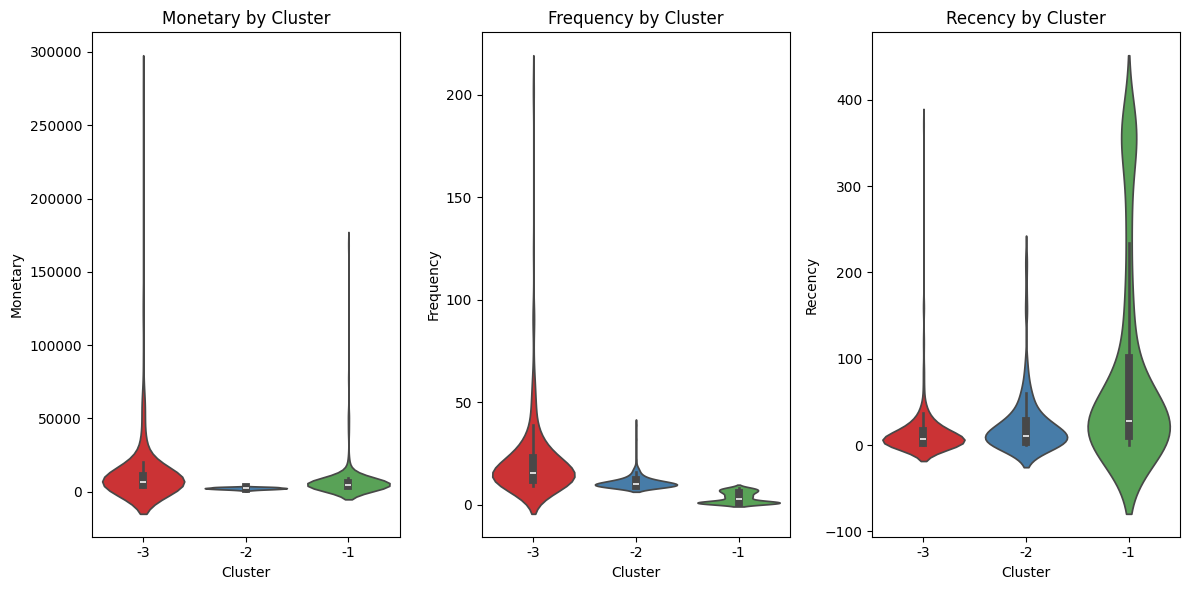

In [ ]:
# prompt: visualisasikan violinplot outlier_clusters_df

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Create violin plots for each RFM variable, separated by cluster
plt.subplot(1, 3, 1)
sns.violinplot(x='Cluster', y='Monetary', data=outlier_clusters_df, palette='Set1')
plt.title('Monetary by Cluster')

plt.subplot(1, 3, 2)
sns.violinplot(x='Cluster', y='Frequency', data=outlier_clusters_df, palette='Set1')
plt.title('Frequency by Cluster')

plt.subplot(1, 3, 3)
sns.violinplot(x='Cluster', y='Recency', data=outlier_clusters_df, palette='Set1')
plt.title('Recency by Cluster')

plt.savefig("Outliers.png",dpi=300)

plt.tight_layout()
plt.show()

##Indo



---

### **Cluster -1: "High-Value Intermittent Spenders"**

- **Karakteristik:**
  - **Monetary:** Tinggi
  - **Frequency:** Rendah
  - **Recency:** Rendah (sering melakukan transaksi baru-baru ini)

- **Deskripsi:**
  Pelanggan dalam cluster ini adalah pembelanja bernilai tinggi yang melakukan transaksi besar, namun tidak terlalu sering. Mereka mungkin berbelanja karena kebutuhan tertentu atau memilih barang premium pada kesempatan tertentu.

- **Strategi:**
  1. **Program Eksklusif Loyalitas:** Berikan mereka insentif untuk terus melakukan pembelian besar dengan memberikan poin atau diskon khusus setiap kali mereka mencapai ambang batas pengeluaran tertentu.
  2. **Penawaran Produk Premium:** Rekomendasikan produk atau layanan premium yang mungkin menarik bagi mereka, didukung dengan pengalaman personalisasi.
  3. **Ucapan Terima Kasih VIP:** Kirimkan catatan ucapan terima kasih khusus atau undangan acara VIP untuk memperkuat loyalitas mereka terhadap brand.

---

### **Cluster -2: "Frequent Low-Spenders"**

- **Karakteristik:**
  - **Monetary:** Rendah
  - **Frequency:** Tinggi
  - **Recency:** Rendah (sering melakukan transaksi baru-baru ini)

- **Deskripsi:**
  Pelanggan ini sering bertransaksi, namun dengan nilai per transaksi yang rendah. Mereka mungkin cenderung membeli produk yang lebih kecil atau terjangkau, lebih didorong oleh kebutuhan praktis daripada keinginan untuk berbelanja besar.

- **Strategi:**
  1. **Diskon Bundling dan Pembelian Grosir:** Tawarkan diskon untuk pembelian dalam jumlah banyak atau bundling produk untuk mendorong mereka melakukan pembelian yang lebih besar dalam satu transaksi.
  2. **Inisiatif Pembelian Sering:** Buat program loyalitas untuk pembelian sering, di mana mereka mendapatkan diskon atau insentif setelah beberapa kali pembelian dalam waktu singkat.
  3. **Saran Produk Tambahan:** Berikan rekomendasi produk tambahan yang relevan saat checkout untuk mendorong pembelian tambahan.

---

### **Cluster -3: "High-Frequency High-Spenders"**

- **Karakteristik:**
  - **Monetary:** Tinggi
  - **Frequency:** Tinggi
  - **Recency:** Rendah (sering melakukan transaksi baru-baru ini)

- **Deskripsi:**
  Cluster ini adalah pelanggan dengan tingkat transaksi yang tinggi baik dari sisi frekuensi maupun nilai transaksi. Mereka memiliki keterikatan kuat dengan brand dan sering melakukan pembelian bernilai tinggi.

- **Strategi:**
  1. **Program Loyalitas Kelas Atas:** Tempatkan mereka dalam program loyalitas eksklusif dengan manfaat khusus, seperti produk gratis, akses pertama ke produk baru, atau layanan pelanggan khusus.
  2. **Model Langganan atau Keanggotaan:** Tawarkan layanan berlangganan untuk produk yang sering mereka beli, dilengkapi dengan manfaat eksklusif yang mendorong pembelian berkelanjutan.
  3. **Penghargaan Berbasis Pengalaman:** Berikan penghargaan yang berbasis pengalaman (seperti undangan acara khusus atau previu produk) untuk memperkuat hubungan emosional mereka dengan brand.

---


##English


---

 **Cluster -1: "High-Value Intermittent Spenders"**

- **Characteristics:**
  - **Monetary:** High
  - **Frequency:** Low
  - **Recency:** Low (frequent recent transactions)

- **Description:**
  Customers in this cluster make high-value purchases but do so infrequently. They may shop for specific needs or choose premium items occasionally.

- **Strategy:**
  1. **Exclusive Loyalty Program:** Offer incentives to encourage repeat high-value purchases, like special points or discounts once they reach a spending threshold.
  2. **Premium Product Offers:** Recommend premium or high-end products that may appeal to them, supported by personalized experiences.
  3. **VIP Thank-You Notes:** Send personalized thank-you notes or VIP event invitations to strengthen their loyalty to the brand.

---

 **Cluster -2: "Frequent Low-Spenders"**

- **Characteristics:**
  - **Monetary:** Low
  - **Frequency:** High
  - **Recency:** Low (frequent recent transactions)

- **Description:**
  These customers transact frequently but with low transaction values. They may tend to buy smaller or affordable items, driven more by practicality than by a desire for high-end shopping.

- **Strategy:**
  1. **Bundled Discounts and Bulk Purchases:** Offer discounts for bulk purchases or product bundles to encourage them to make larger purchases in a single transaction.
  2. **Frequent Buyer Program:** Create a loyalty program for frequent purchases, where they earn discounts or incentives after several purchases within a short period.
  3. **Add-On Product Suggestions:** Provide relevant add-on product suggestions at checkout to encourage additional purchases.

---

 **Cluster -3: "High-Frequency High-Spenders"**

- **Characteristics:**
  - **Monetary:** High
  - **Frequency:** High
  - **Recency:** Low (frequent recent transactions)

- **Description:**
  This cluster includes customers who make both high-frequency and high-value transactions. They are strongly engaged with the brand and make high-value purchases frequently.

- **Strategy:**
  1. **Top-Tier Loyalty Program:** Place them in an exclusive loyalty program with special benefits, like complimentary products, early access to new releases, or dedicated customer service.
  2. **Subscription or Membership Model:** Offer a subscription service for the products they often buy, enhanced with exclusive perks to encourage sustained purchasing.
  3. **Experience-Based Rewards:** Provide experience-based rewards (like special event invitations or product previews) to deepen their emotional connection with the brand.

---


In [ ]:
# prompt: jadikan satu antara outlier dan non outlier

# Concatenate the DataFrames
final_df = pd.concat([non_outliers_df, outlier_clusters_df])

# Display the combined DataFrame
final_df

,CustomerID,Frequency,Max_Order_Date,Monetary,Recency,Cluster
2,12348.0,4,2011-09-25 13:13:00,1437.24,74,2
3,12349.0,1,2011-11-21 09:51:00,1457.55,18,3
4,12350.0,1,2011-02-02 16:01:00,294.40,309,0
5,12352.0,7,2011-11-03 14:37:00,1385.74,35,2
6,12353.0,1,2011-05-19 17:47:00,89.00,203,0
...,...,...,...,...,...,...
4268,18198.0,17,2011-12-05 14:49:00,5425.56,3,-3
4287,18223.0,14,2011-12-05 09:11:00,6484.54,4,-3
4289,18225.0,12,2011-12-06 13:27:00,5509.12,2,-3
4290,18226.0,11,2011-10-26 13:36:00,5228.05,43,-3


In [ ]:
# prompt: buatkan colom baru untuk mapping Cluster -3: "High-Frequency High-Spenders"Cluster -2: "Frequent Low-Spenders"Cluster -1: "High-Value Intermittent Spenders"Cluster 0 - "Lost Customers"Cluster 1 - "Occasional Customers"Cluster 2 - "High-Value Loyal Customers"Cluster 3 - "Infrequent High-Spenders"

cluster_mapping = {
    -3: "High-Frequency High-Spenders",
    -2: "Frequent Low-Spenders",
    -1: "High-Value Intermittent Spenders",
    0: "Lost Customers",
    1: "Occasional Customers",
    2: "High-Value Loyal Customers",
    3: "Infrequent High-Spenders"
}

final_df["Segment"] = final_df["Cluster"].map(cluster_mapping)
final_df

,CustomerID,Frequency,Max_Order_Date,Monetary,Recency,Cluster,Segment
2,12348.0,4,2011-09-25 13:13:00,1437.24,74,2,High-Value Loyal Customers
3,12349.0,1,2011-11-21 09:51:00,1457.55,18,3,Infrequent High-Spenders
4,12350.0,1,2011-02-02 16:01:00,294.40,309,0,Lost Customers
5,12352.0,7,2011-11-03 14:37:00,1385.74,35,2,High-Value Loyal Customers
6,12353.0,1,2011-05-19 17:47:00,89.00,203,0,Lost Customers
...,...,...,...,...,...,...,...
4268,18198.0,17,2011-12-05 14:49:00,5425.56,3,-3,High-Frequency High-Spenders
4287,18223.0,14,2011-12-05 09:11:00,6484.54,4,-3,High-Frequency High-Spenders
4289,18225.0,12,2011-12-06 13:27:00,5509.12,2,-3,High-Frequency High-Spenders
4290,18226.0,11,2011-10-26 13:36:00,5228.05,43,-3,High-Frequency High-Spenders


In [ ]:
final_df.describe()

,Frequency,Max_Order_Date,Monetary,Recency,Cluster
count,5705.000000,5705,5705.000000,5705.000000,5705.000000
mean,3.465907,2011-08-14 15:36:46.338299904,1800.543776,116.341280,0.666082
min,1.000000,2010-12-01 09:53:00,0.420000,0.000000,-3.000000
25%,1.000000,2011-05-23 16:32:00,236.300000,22.000000,0.000000
50%,1.000000,2011-09-29 13:23:00,612.080000,70.000000,1.000000
75%,4.000000,2011-11-16 16:52:00,1569.110000,199.000000,1.000000
max,206.000000,2011-12-09 12:50:00,279138.020000,373.000000,3.000000
std,6.797481,NaN,7876.263524,111.527525,1.381028


In [ ]:
final_df.describe(include='object')

,CustomerID,Segment
count,5705.0,5705
unique,5705.0,7
top,12348.0,Occasional Customers
freq,1.0,2115


<ipython-input-136-844d51ccd4d6>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


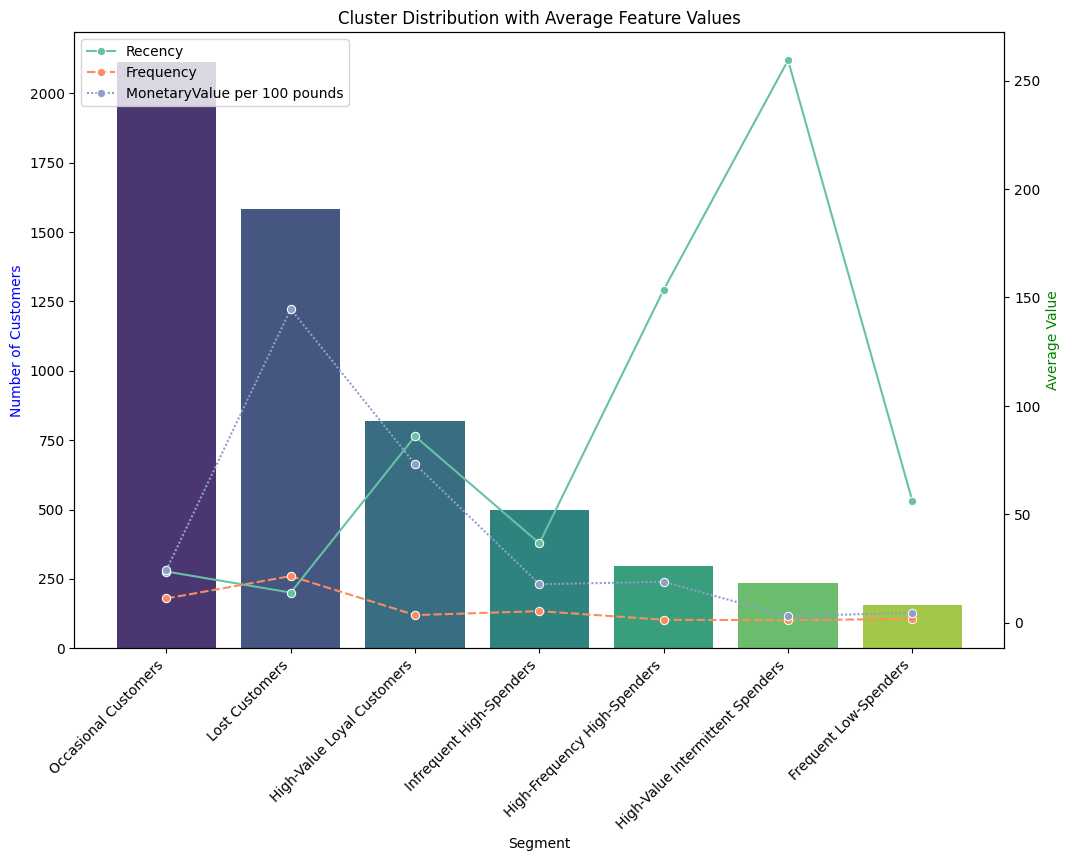

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data (Asumsikan final_df sudah diinisialisasi)
cluster_counts = final_df['Segment'].value_counts()
final_df["MonetaryValue per 100 pounds"] = final_df["Monetary"] / 100.00
feature_means = final_df.groupby('Segment')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot bar untuk distribusi klaster
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot line untuk rata-rata nilai fitur
ax2 = ax1.twinx()
sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()


In [ ]:
final_df.drop(columns='MonetaryValue per 100 pounds',inplace=True)

In [ ]:
final_df.to_csv("final_df.csv",index=False)

In [ ]:
df_clean.to_csv("df_clean.csv",index=False)